<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/main/nb/Chapter10.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch. 10 – Physical

## Figure 10.3. Waveform, loudness, and onset strengths (black curve) and estimated beats (dashed lines) of the intro to Help! by The Beatles.

### Libraries

In [27]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib import pyplot as plt
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

### 1. Read audio file

In [28]:
url = "https://raw.githubusercontent.com/tuomaseerola/emr/main/data/help.wav"
x, sr = sf.read(io.BytesIO(urlopen(url).read()),start=round(1.05*16000),stop=round((1.05+10.087)*16000))
#x, sr = librosa.load('data/help.mp3', offset=1.05, duration=10.087)
ipd.display(ipd.Audio(data=x, rate=sr))

### 2. Plot waveform

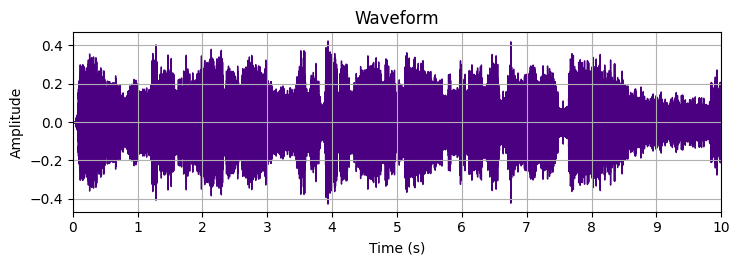

In [29]:
fig, ax = plt.subplots(nrows=1,figsize=(7.5, 2.75))
librosa.display.waveshow(x, sr=sr, ax=ax, color='indigo')

ax.set_title("Waveform")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_xticks(range(0, 11, 1))
ax.set_xlim([0, 10])
ax.grid()
fig.tight_layout()
plt.show()

### 3. Plot loudness

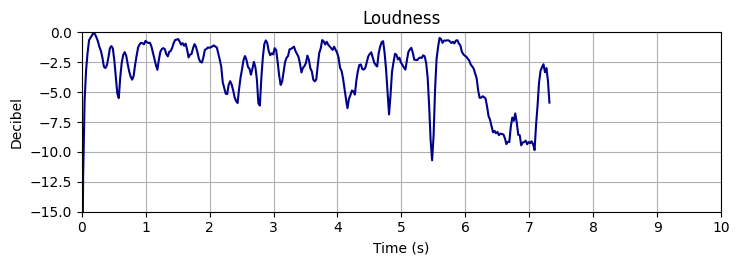

In [30]:
fig, ax = plt.subplots(nrows=1, figsize=(7.5, 2.75))
rms = librosa.feature.rms(y=x)                 # Extra dynamics (RMS)
db = librosa.amplitude_to_db(rms, ref=np.max)   # Convert into dB. Note that this is a relative measure (loudest is now 0)
times = librosa.times_like(rms)

ax.plot(times, db[0], color='darkblue')
ax.set_title("Loudness")
ax.set_ylim([-15,0])
ax.set_ylabel("Decibel")
ax.set_xlabel("Time (s)")
ax.set_xticks(range(0, 11, 1))
ax.set_xlim([0, 10])
ax.grid()
fig.tight_layout()
plt.show()

### 4. Plot onset strength, estimated and annotated beats

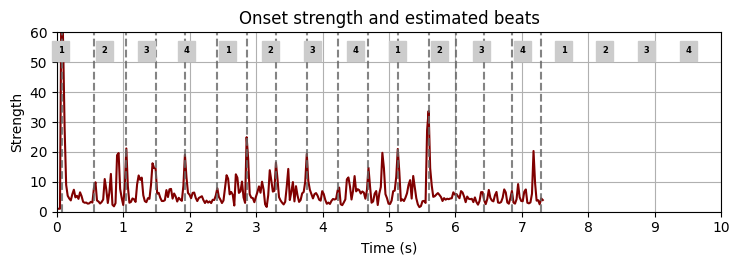

In [31]:
fig, ax = plt.subplots(nrows=1, figsize=(7.5, 2.75))


onset_subbands = librosa.onset.onset_strength_multi(y=x,
                                                    sr=sr,
                                                    channels=[0, 32, 64, 96, 128])

onset_subbands_s = sum(onset_subbands, 1)
ax.plot(times, onset_subbands_s, 'maroon')

tempo, beats = librosa.beat.beat_track(y=x, sr=sr, trim=False)
plt.vlines(times[beats], 0, onset_subbands_s.max(), color='0.40', alpha=0.80,
           linestyle='--', label='Beats')

o_env = librosa.onset.onset_strength(y=x, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

ax.set_title("Onset strength and estimated beats")
ax.set_ylabel("Strength")
ax.set_xlabel("Time (s)")
ax.set_ylim([0, 60])
ax.set_xticks(range(0, 11, 1))
ax.set_xlim([0, 10])
ax.grid()
fig.tight_layout()

#data = np.loadtxt('data/Help_beats.csv')
url = "https://raw.githubusercontent.com/tuomaseerola/emr/main/data/Help_beats.csv"
data = np.loadtxt(url)

ann_time = data[0:16, 0]-1.05
ann_label = data[0:16, 1]
for x in range(16):
    ax.text(ann_time[x], 53, int(ann_label[x]), size=6,
            backgroundcolor='0.8', weight='bold', ha='center')

plt.show()